In [2]:
import numpy as np
import pandas as pd

#load the csv into dataframe
fileName = 'SentimentAnalysisDataset.csv'
df = pd.read_csv(fileName)
df.head()

ParserError: Error tokenizing data. C error: Expected 4 fields in line 8836, saw 5


In [3]:
#apparently some of the tweets contain ',' as well (which is not surprising)
#so I'm thinking about loading the data manually and then converting them into dataframe later
dataList = []
columnsName = []
with open(fileName, 'r', encoding='utf8') as f:
    columnsName = f.readline().split(',')
    for line in f:
        l = line.split(',')
        dataList.append([int(l[0]), int(l[1]), l[2], ''.join(l[3:])])

In [4]:
#convert data into dataframe
df = pd.DataFrame(dataList)
df.columns = ['ItemID', 'Sentiment', 'SentimentSource', 'SentimentText']

In [103]:
print(df.head())
print(df.info())
print(df.describe())

   ItemID  Sentiment SentimentSource  \
0       1          0    Sentiment140   
1       2          0    Sentiment140   
2       3          1    Sentiment140   
3       4          0    Sentiment140   
4       5          0    Sentiment140   

                                       SentimentText  
0                       is so sad for my APL frie...  
1                     I missed the New Moon trail...  
2                          omg its already 7:30 :O\n  
3            .. Omgaga. Im sooo  im gunna CRy. I'...  
4           i think mi bf is cheating on me!!!   ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578627 entries, 0 to 1578626
Data columns (total 4 columns):
ItemID             1578627 non-null int64
Sentiment          1578627 non-null int64
SentimentSource    1578627 non-null object
SentimentText      1578627 non-null object
dtypes: int64(2), object(2)
memory usage: 48.2+ MB
None
             ItemID     Sentiment
count  1.578627e+06  1.578627e+06
mean   7.893140e+05  5.

In [104]:
#now we want to show the top-10 most positive and negative words
#let's separate the data frame into positive and negative ones
df_positive = df[df['Sentiment'] == 1]
df_negative = df[df['Sentiment'] == 0]

df_positive.info()
df_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790185 entries, 2 to 1578623
Data columns (total 4 columns):
ItemID             790185 non-null int64
Sentiment          790185 non-null int64
SentimentSource    790185 non-null object
SentimentText      790185 non-null object
dtypes: int64(2), object(2)
memory usage: 30.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 788442 entries, 0 to 1578626
Data columns (total 4 columns):
ItemID             788442 non-null int64
Sentiment          788442 non-null int64
SentimentSource    788442 non-null object
SentimentText      788442 non-null object
dtypes: int64(2), object(2)
memory usage: 30.1+ MB


In [5]:
#find the most frequest word from each data frame

#use some features from nltk library
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from collections import Counter

#since the data are clearly tweets
#we can use the tokenizer, specially built for them
#and it should also be beneficial to exclude English stopwords (optional)
#finally a lemmatizer
twtknzr = TweetTokenizer()
englishStopwords = stopwords.words('english')
wnLemmatizer = WordNetLemmatizer()

def getWordCounter(df, skipStopWords=True):
    tweets = list(df.SentimentText)
    all_tokens = [twtknzr.tokenize(t) for t in tweets]
    
    r'''
    Do the following preprocessing:
    1. turn into lower case
    2. consider the alphabet characters only
    3. skip the english stopwords (optional)
    4. lemmatize the words
    '''
    
    word_list = []
    
    #make the condition outside of the loop to avoid additional if in every loop
    if skipStopWords:
        for tokens in all_tokens:
            tokens = [t.lower() for t in tokens if t.isalpha()]
            tokens = [wnLemmatizer.lemmatize(t) for t in tokens if t not in englishStopwords]

            word_list.extend(tokens)
    else:
        for tokens in all_tokens:
            tokens = [wnLemmatizer.lemmatize(t.lower()) for t in tokens if t.isalpha()]
            
            word_list.extend(tokens)
        
    return Counter(word_list)
        
    

In [108]:
#check the top word count without skipping stop words
positiveWordCounter = getWordCounter(df_positive, skipStopWords=False)
print(positiveWordCounter.most_common(10))
negativeWordCounter = getWordCounter(df_negative, skipStopWords=False)
print(negativeWordCounter.most_common(10))

[('i', 294714), ('the', 264120), ('to', 249959), ('a', 218123), ('you', 177109), ('and', 148669), ('it', 132291), ('my', 124909), ('for', 116512), ('is', 108018)]
[('i', 470347), ('to', 310991), ('the', 257003), ('a', 199752), ('my', 188551), ('and', 153391), ('it', 145901), ('is', 127069), ('in', 114491), ('for', 98521)]


In [43]:
#they are not very relevant I guess
#what if we skip the stop words for fun
positiveWordCounter_nostop = getWordCounter(df_positive)
print(positiveWordCounter_nostop.most_common(10))
negativeWordCounter_nostop = getWordCounter(df_negative)
print(negativeWordCounter_nostop.most_common(10))

[('good', 60611), ('day', 53120), ('love', 50058), ('u', 38625), ('like', 38144), ('get', 37930), ('lol', 35499), ('thanks', 34460), ('time', 33633), ('going', 30503)]
[('day', 49233), ('get', 47796), ('go', 47481), ('work', 45295), ('like', 41251), ('today', 37465), ('want', 33633), ('going', 33379), ('got', 32976), ('back', 32532)]


In [109]:
#how about from the whole dataframe?
allWordCounter = getWordCounter(df, skipStopWords=False)
print(allWordCounter.most_common(10))

[('i', 765061), ('to', 560950), ('the', 521123), ('a', 417875), ('my', 313460), ('and', 302060), ('it', 278192), ('you', 271831), ('is', 235087), ('for', 215033)]


Text(0.5,1,'log-log Plot of Rank vs Frequency')

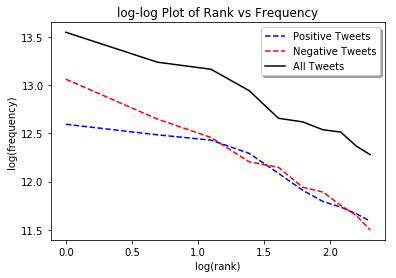

In [110]:
#plot to prove the Zipf's Law
import matplotlib.pyplot as plt

#n is number of n-first element that we want to see
n = 10

x = [np.log(i+1) for i in range(n)]

y_positive = [np.log(i[1]) for i in positiveWordCounter.most_common(n)]
y_negative = [np.log(i[1]) for i in negativeWordCounter.most_common(n)]
y_all = [np.log(i[1]) for i in allWordCounter.most_common(n)]

fig, ax = plt.subplots()
ax.plot(x, y_positive, 'b--', label='Positive Tweets')
ax.plot(x, y_negative, 'r--', label='Negative Tweets')
ax.plot(x, y_all, 'k', label='All Tweets')

legend = ax.legend(loc='best', shadow=True)

ax.set_xlabel('log(rank)')
ax.set_ylabel('log(frequency)')

plt.title('log-log Plot of Rank vs Frequency')

#Note: it does look like they are inversely proportional!

In [49]:
#CLassification
#first let's see how many different words in total do we have
print(len(allWordCounter))

250954


In [18]:
#that's way too many
#I think we'd better off without the stop words since they are less relevant
allWordCounter_nostop = getWordCounter(df)
print(allWordCounter_nostop.most_common(10))
print(len(allWordCounter_nostop))

[('day', 102353), ('good', 89449), ('get', 85726), ('like', 79395), ('go', 77439), ('u', 68481), ('love', 67671), ('today', 66738), ('work', 66511), ('time', 64713)]
250850


In [19]:
#we have excluded 104 stopwords from the word list
#it doesn't look like a great idea to consider all of them though
#let's see if we consider only words that occur at least 100 times

def limitWordCounter(wordCounter, threshold):
    result = {}
    for word in wordCounter:
        wordCount = wordCounter[word]
        if wordCount > threshold:
            result[word] = wordCount
    return Counter(result)

#Let's see how many words are left for different threshold
thresholds = [50, 100, 250, 500, 1000, 5000, 10000]
for t in thresholds:
    newData = limitWordCounter(allWordCounter_nostop, t)
    print('[Threshold: {}] #words left: {}'.format(t, len(newData)))

[Threshold: 50] #words left: 11007
[Threshold: 100] #words left: 7297
[Threshold: 250] #words left: 3952
[Threshold: 500] #words left: 2448
[Threshold: 1000] #words left: 1452
[Threshold: 5000] #words left: 372
[Threshold: 10000] #words left: 175


In [114]:
#let's try with 175 features and see the result
wordList = list(limitWordCounter(allWordCounter_nostop, 10000))
print(len(wordList))
print(wordList)

175
['sad', 'friend', 'missed', 'new', 'omg', 'already', 'im', 'get', 'think', 'much', 'work', 'tomorrow', 'tonight', 'today', 'miss', 'thanks', 'day', 'weekend', 'ok', 'way', 'feel', 'right', 'man', 'twitter', 'feeling', 'gonna', 'go', 'well', 'year', 'start', 'happy', 'one', 'see', 'pretty', 'awesome', 'tweet', 'lost', 'something', 'yeah', 'please', 'tell', 'wish', 'could', 'life', 'going', 'like', 'really', 'want', 'sleep', 'hour', 'girl', 'hate', 'live', 'guy', 'sure', 'morning', 'need', 'week', 'dont', 'sick', 'cant', 'yay', 'great', 'time', 'last', 'got', 'someone', 'even', 'say', 'show', 'make', 'look', 'another', 'fun', 'though', 'never', 'love', 'ur', 'u', 'always', 'hurt', 'first', 'night', 'find', 'thought', 'lol', 'wanna', 'home', 'x', 'mean', 'away', 'would', 'sorry', 'take', 'come', 'bed', 'bit', 'watch', 'hope', 'ever', 'let', 'game', 'phone', 'movie', 'guess', 'two', 'cool', 'oh', 'thank', 'soon', 'back', 'damn', 'next', 'help', 'better', 'getting', 'rain', 'summer', 's

In [24]:
#then I want to transform our data 
#each into a list with length = len(wordList) with value = number of occurence
#the idea is quite similar with predicting picture
#it might take a while since we have 1.5 mio. rows
#since my memory can't handle all of them, let's sample
#~150k entries seem decent amount of data

sampleSize = 0.1
df_sampled = df.sample(frac=sampleSize, random_state=42)

print(df_sampled.head())
print(df_sampled.info())
print(df_sampled.describe())

          ItemID  Sentiment SentimentSource  \
726314    726315          1    Sentiment140   
700733    700734          0    Sentiment140   
1364809  1364810          0    Sentiment140   
70231      70232          0    Sentiment140   
508934    508935          1    Sentiment140   

                                             SentimentText  
726314   "@DavidArchie I was just listening to Somebody...  
700733   Endlessly fascinated by the dual engine monito...  
1364809  4 classes and 3 finals until freedom!!! Cannot...  
70231    @BurritoBandita yay i'm glad she's looking mor...  
508934   @thalonelystoner I got it today!!! Omg it was ...  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 157863 entries, 726314 to 384334
Data columns (total 4 columns):
ItemID             157863 non-null int64
Sentiment          157863 non-null int64
SentimentSource    157863 non-null object
SentimentText      157863 non-null object
dtypes: int64(2), object(2)
memory usage: 6.0+ MB
None
             It

In [25]:
#also update the word counter
allWordCounter_sampled_nostop = getWordCounter(df_sampled)
print(allWordCounter_sampled_nostop.most_common(10))
print(len(allWordCounter_sampled_nostop))

[('day', 10371), ('good', 8996), ('get', 8408), ('like', 8162), ('go', 7892), ('u', 6903), ('love', 6812), ('work', 6676), ('today', 6645), ('time', 6594)]
61144


In [47]:
#update wordList based on sampled data frame
wordList = list(limitWordCounter(allWordCounter_sampled_nostop, 1000))
print(len(wordList))
print(wordList)

177
['one', 'awesome', 'song', 'thought', 'sorry', 'next', 'wait', 'summer', 'looking', 'work', 'know', 'need', 'yay', 'glad', 'like', 'got', 'today', 'omg', 'lol', 'trying', 'hope', 'make', 'feel', 'bad', 'call', 'damn', 'well', 'go', 'yes', 'lot', 'birthday', 'sound', 'amazing', 'would', 'good', 'sure', 'great', 'x', 'working', 'show', 'week', 'way', 'oh', 'tweet', 'maybe', 'day', 'back', 'best', 'ever', 'thanks', 'finally', 'hot', 'last', 'two', 'friend', 'guess', 'fun', 'get', 'find', 'someone', 'want', 'much', 'right', 'hurt', 'away', 'girl', 'actually', 'happy', 'love', 'wish', 'keep', 'gonna', 'come', 'tired', 'bed', 'cant', 'sleep', 'really', 'night', 'see', 'pretty', 'something', 'everyone', 'movie', 'w', 'party', 'never', 'home', 'house', 'still', 'sick', 'though', 'morning', 'let', 'stuff', 'tonight', 'think', 'could', 'people', 'help', 'even', 'twitter', 'little', 'already', 'time', 'miss', 'watching', 'follow', 'going', 'yeah', 'getting', 'done', 'yet', 'watch', 'u', 'alwa

In [21]:
#save lemmatized tokens
tweets = list(df_sampled.SentimentText)
allTokens = [twtknzr.tokenize(t) for t in tweets]
lemmatizedTokens = [[wnLemmatizer.lemmatize(t.lower()) for t in tokens if t.isalpha()] for tokens in allTokens]

In [34]:
#create the (sparse) data of all words we want to analyze
X = []
for tokens in lemmatizedTokens:
    row = [tokens.count(w) for w in wordList]
    X.append(row)

X = np.array(X)
print(X.shape)

#as for the classification result, we have the sentiment column
from keras.utils import np_utils

y = np_utils.to_categorical(df_sampled.Sentiment)
print(y.shape)

(157863, 177)
(157863, 2)


In [35]:
#create deep learning model using keras
from keras.models import Sequential
from keras.layers import Dense

num_features = X.shape[1]

model = Sequential()
#add the first hidden layer
model.add(Dense(num_features, activation='relu', input_dim=num_features,
               kernel_initializer='normal'))

#add the output layer
model.add(Dense(2, activation='softmax', kernel_initializer='normal'))

#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

#try to fit the model and see the result
validationSplit = 0.1
batchSize = 100

model.fit(X, y, validation_split=validationSplit,
         batch_size=batchSize, epochs=5, verbose=2)

#accuracy is ~68%

Train on 142076 samples, validate on 15787 samples
Epoch 1/5
 - 3s - loss: 0.5932 - acc: 0.6700 - val_loss: 0.5807 - val_acc: 0.6859
Epoch 2/5
 - 2s - loss: 0.5797 - acc: 0.6806 - val_loss: 0.5783 - val_acc: 0.6812
Epoch 3/5
 - 2s - loss: 0.5733 - acc: 0.6860 - val_loss: 0.5783 - val_acc: 0.6851
Epoch 4/5
 - 2s - loss: 0.5671 - acc: 0.6907 - val_loss: 0.5798 - val_acc: 0.6810
Epoch 5/5
 - 2s - loss: 0.5609 - acc: 0.6945 - val_loss: 0.5796 - val_acc: 0.6836


In [60]:
#177 features is kinda weak
#let's try using much more and see the difference in result
wordList = list(limitWordCounter(allWordCounter_sampled_nostop, 50))
print(len(wordList))
print(wordList)

2427
['listening', 'somebody', 'one', 'awesome', 'song', 'thought', 'put', 'reminds', 'fail', 'sorry', 'next', 'class', 'final', 'cannot', 'wait', 'summer', 'looking', 'forward', 'work', 'know', 'need', 'yay', 'glad', 'like', 'boo', 'ticket', 'got', 'today', 'omg', 'lol', 'fair', 'traffic', 'jam', 'trying', 'rose', 'hope', 'make', 'feel', 'bad', 'many', 'country', 'number', 'call', 'damn', 'well', 'go', 'yes', 'lot', 'space', 'birthday', 'sound', 'amazing', 'tea', 'would', 'ny', 'good', 'luck', 'sure', 'great', 'x', 'bos', 'bought', 'lunch', 'working', 'macbook', 'show', 'might', 'air', 'week', 'way', 'oh', 'stupid', 'pen', 'seeing', 'half', 'tweet', 'maybe', 'issue', 'day', 'till', 'mi', 'bday', 'either', 'back', 'tho', 'best', 'parent', 'ever', 'thanks', 'mom', 'dad', 'finally', 'geek', 'glass', 'hot', 'topic', 'last', 'pair', 'two', 'friend', 'fighting', 'far', 'guess', 'thats', 'plus', 'whoop', 'forgot', 'send', 'tweeted', 'normal', 'xd', 'anyways', 'thursday', 'fun', 'get', 'worry

In [61]:
X = []
for tokens in lemmatizedTokens:
    row = [tokens.count(w) for w in wordList]
    X.append(row)

X = np.array(X)
print(X.shape)

(157863, 2427)


In [62]:
num_features = X.shape[1]

model = Sequential()
#add the first hidden layer
model.add(Dense(num_features, activation='relu', input_dim=num_features,
               kernel_initializer='normal'))

#add the output layer
model.add(Dense(2, activation='softmax', kernel_initializer='normal'))

#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

#try to fit the model and see the result
validationSplit = 0.33
batchSize = 100

model.fit(X, y, validation_split=validationSplit,
         batch_size=batchSize, epochs=5, verbose=2)

#it's definitely better. 
#we can reach over 95% model accuracy and 73% validation accuracy 

Train on 105768 samples, validate on 52095 samples
Epoch 1/5
 - 151s - loss: 0.5334 - acc: 0.7358 - val_loss: 0.5163 - val_acc: 0.7468
Epoch 2/5
 - 133s - loss: 0.4531 - acc: 0.7871 - val_loss: 0.5290 - val_acc: 0.7476
Epoch 3/5
 - 131s - loss: 0.3312 - acc: 0.8558 - val_loss: 0.6011 - val_acc: 0.7360
Epoch 4/5
 - 131s - loss: 0.1795 - acc: 0.9290 - val_loss: 0.7307 - val_acc: 0.7337
Epoch 5/5
 - 131s - loss: 0.1113 - acc: 0.9562 - val_loss: 0.8614 - val_acc: 0.7313


In [63]:
#we can use early stopping to prevent declining accuracy
from keras.callbacks import EarlyStopping

model = Sequential()
#add the first hidden layer
model.add(Dense(num_features, activation='relu', input_dim=num_features,
               kernel_initializer='normal'))

#add the output layer
model.add(Dense(2, activation='softmax', kernel_initializer='normal'))

#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X, y, validation_split=validationSplit,
         batch_size=batchSize, epochs=20, verbose=2,
         callbacks=[EarlyStopping(patience=2)])

Train on 105768 samples, validate on 52095 samples
Epoch 1/20
 - 127s - loss: 0.0870 - acc: 0.9649 - val_loss: 0.9674 - val_acc: 0.7301
Epoch 2/20
 - 130s - loss: 0.0771 - acc: 0.9679 - val_loss: 1.0176 - val_acc: 0.7296
Epoch 3/20
 - 131s - loss: 0.0714 - acc: 0.9700 - val_loss: 1.0784 - val_acc: 0.7321


In [6]:
#After second thought, maybe we should try with simpler model
#such as Naive Bayes

#let's try to use the whole data
#see if my computer works
X = df.SentimentText
y = df.Sentiment

from sklearn.model_selection import train_test_split

seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [7]:
#try using simple count vectorizer with English stop words
from sklearn.feature_extraction.text import CountVectorizer
countVec = CountVectorizer(stop_words='english')

#select only the best features
from sklearn.feature_selection import chi2, SelectKBest

chi_k = 1000
selectKBest = SelectKBest(chi2, chi_k)

#as classifier let's try using naive bayes
from sklearn.naive_bayes import MultinomialNB

alpha = 0.3
clf = MultinomialNB(alpha=alpha)

#fit all of the steps in a pipeline
from sklearn.pipeline import Pipeline

pl = Pipeline([('vectorizer', countVec), ('dim_red', selectKBest), ('clf', clf)])

In [8]:
#fit the data
pl.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
  ... chi2 at 0x0000021BC28DBD08>)), ('clf', MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True))])

In [9]:
from sklearn import metrics

pred = pl.predict(X_test)
print(metrics.accuracy_score(y_test, pred))

#we got almost 75% acc with this very simple model

0.7450384193889639


In [149]:
#let's try tuning some hyper parameters

chi_ks = [1500, 2000, 3000, 5000]
for k in chi_ks:
    selectKBest = SelectKBest(chi2, k)
    pl = Pipeline([('vectorizer', countVec), ('dim_red', selectKBest), ('clf', clf)])
    #fit the data
    pl.fit(X_train, y_train)
    pred = pl.predict(X_test)
    acc = metrics.accuracy_score(y_test, pred)
    
    print('[k: {}] score: {}'.format(k, acc))

[k: 1500] score: 0.7503679350660594
[k: 2000] score: 0.7539364301113413
[k: 3000] score: 0.7565188380642287
[k: 5000] score: 0.7597262605339229


In [10]:
#well it improves the result, however barely
#I think I'm gonna try without dimension reduction
pl = Pipeline([('vectorizer', countVec), ('clf', clf)])
#fit the data
pl.fit(X_train, y_train)
pred = pl.predict(X_test)
acc = metrics.accuracy_score(y_test, pred)

print('[k: {}] score: {}'.format('none', acc))

#well, it's actually better and not that slow
#so we don't need to use dim_red for this model

[k: none] score: 0.7607376860526743


In [12]:
#let's tune alpha now
alphas = [0.1, 0.3, 0.5, 0.7, 1]
for alpha in alphas:
    clf = MultinomialNB(alpha=alpha)
    pl = Pipeline([('vectorizer', countVec), ('clf', clf)])
    #fit the data
    pl.fit(X_train, y_train)
    pred = pl.predict(X_test)
    acc = metrics.accuracy_score(y_test, pred)
    
    print('[alpha: {}] score: {}'.format(alpha, acc))

[alpha: 0.1] score: 0.7543587372172917
[alpha: 0.3] score: 0.7607376860526743
[alpha: 0.5] score: 0.7634932399190015
[alpha: 0.7] score: 0.7650958953860837
[alpha: 1] score: 0.7664430550540658


In [14]:
#alpha=1 apparently has the best result
#what if we use different model

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
pl = Pipeline([('vectorizer', countVec), ('clf', clf)])
pl.fit(X_train, y_train)
pred = pl.predict(X_test)
acc = metrics.accuracy_score(y_test, pred)
print('[classifier: {}] score: {}'.format('logistic regression', acc))

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=seed)
pl = Pipeline([('vectorizer', countVec), ('clf', clf)])
pl.fit(X_train, y_train)
pred = pl.predict(X_test)
acc = metrics.accuracy_score(y_test, pred)
print('[classifier: {}] score: {}'.format('random forest', acc))

#KNeighbors and SVM are too slow, so never mind

[classifier: logistic regression] score: 0.7774884974102017
[classifier: random forest] score: 0.6956242649216937


In [67]:
#let's see the confusion matrix of the logistic regression result
clf = LogisticRegression()
pl = Pipeline([('vectorizer', countVec), ('clf', clf)])
pl.fit(X_train, y_train)
pred = pl.predict(X_test)

acc = metrics.accuracy_score(y_test, pred)
print('[classifier: {}] score: {}'.format('logistic regression', acc))
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))

#the precision and recall seem quite good as well!

[classifier: logistic regression] score: 0.7774884974102017
[[179469  56810]
 [ 48569 188741]]
             precision    recall  f1-score   support

          0       0.79      0.76      0.77    236279
          1       0.77      0.80      0.78    237310

avg / total       0.78      0.78      0.78    473589



In [ ]:
r'''
Final Conclusion:
- I tried using simple deep and supervised learning model
- For deep learning, I only utilized 10% of the data (because of memory limitation)
- The validation result is ~73%
- In the end, the best result was shown by simple logistic regression with count vectorizer with ~77% on test data

Things that can be done to improve accuracy:
- in general, we must improve our features selection
- exclude more irrelevant words (e.g. by using more complete stop words)
- add more context, e.g. by taking punctuations (like more !!!! means that it has stronger weight), 
  lower and upper case, etc. into accounts
- I'm not 100% sure if they are all in English, since I found some foreign alphabets in there, 
  so deeper analysis can be beneficial as well, e.g. using polyglot library or just remove non-english words altogether
- build a more sophisticated model that might work better in this case, but I believe preprocessing techniques are more important
'''